In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import os

from sklearn.model_selection import train_test_split

In [206]:
def transform_dataframe(df):
    df["Title"] = df["Name"].apply(lambda x: re.search(r"\S+\.", x).group(0))
    df["Ticket"] = df["Ticket"].apply(lambda x:re.search(r"^[A-Za-z$.$\/]*", x).group(0))

    categorical_columns = ["Pclass", "Sex", "Embarked", "Title"]

    for coli in categorical_columns:
        df[[coli+str(i) for i in range(0, len(df[coli].unique()))]] = pd.get_dummies(df[coli])

    df.drop(columns = categorical_columns, inplace = True)

    columns_2_drop = ["Name", "Cabin", "Ticket"]

    df.drop(columns = columns_2_drop, inplace = True)
    df.fillna(0, inplace = True)
    
    return df

In [3]:
## Load the train data, we'll use the normal pandas loader rather than the fancy class

df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

df_all = df_train.append(df_test)
df_all

/tmp/ipykernel_102527/2935113830.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_train.append(df_test)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df_all["Name"].apply(lambda x: re.search(r"\S+\.", x).group(0)).unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.', 'Dona.'], dtype=object)

          Survived      Fare
Survived  1.000000  0.257307
Fare      0.257307  1.000000


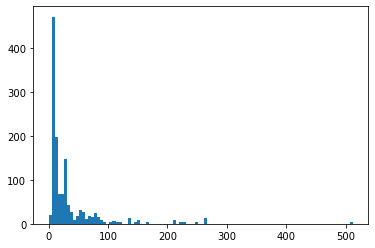

          Survived      Fare
Survived  1.000000  0.257307
Fare      0.257307  1.000000


In [30]:
## We're missing Fare values too, it might be easier to convert to categorical
## Could be worth imputing to categorical and having a 

print(df_all[["Survived", "Fare"]].corr())

import matplotlib.pyplot as plt

plt.hist(df_all["Fare"], bins = 100) 
plt.show() 


sub_df = df_all[["Survived", "Fare"]].copy()
sub_df.loc[sub_df["Fare"] < 50, "Fare"] = 1
sub_df.loc[(50 <= sub_df["Fare"]) & (sub_df["Fare"] < 100), "Fare"] = 2
sub_df.loc[sub_df["Fare"] >= 100, "Fare"] = 3
sub_df

print(df_all[["Survived", "Fare"]].corr())

          Survived       Age
Survived  1.000000 -0.077221
Age      -0.077221  1.000000


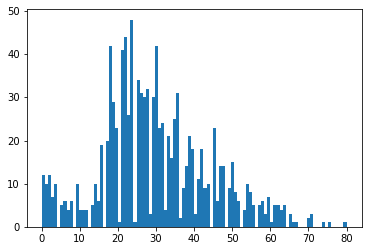

In [24]:
## Because we're missing age it'll be easier for us to impute age if we use an encoding

print(df_all[["Survived", "Age"]].corr())

import matplotlib.pyplot as plt

plt.hist(df_all["Age"], bins = 100)
plt.show() 